# 1.작업형 1유형 (3문항)
- 데이터 탐색
- 데이터 전처리 

In [6]:
import pandas as pd
import seaborn as sns


In [7]:
# 데이터 불러오고 기본정보 확인
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/titanic.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

<Axes: xlabel='Sex', ylabel='count'>

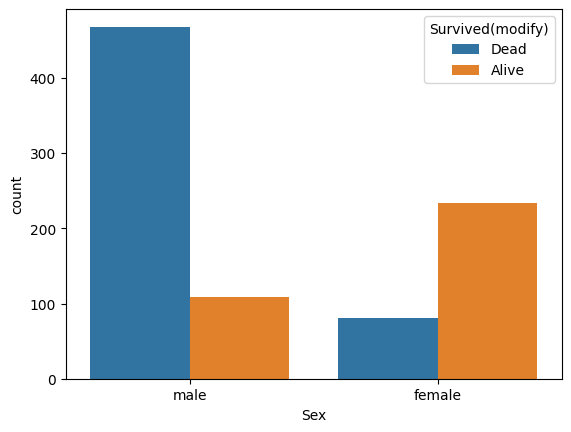

In [10]:
# 데이터 시각화 
df['Survived'].value_counts() # 생존 , 사망 수 확인 
# 생존 = 1 , 사망 =0 을 범주형 변수로 변환  
df['Survived(modify)'] = df['Survived'].replace([0,1],['Dead','Alive'])
sns.countplot(data=df, x='Sex', hue='Survived(modify)')


In [4]:
# 데이터 전처리 


# 2. 작업형 2유형 (1문항)
- 데이터 분석 절차
- 데이터 분석 모델 설계계

# 3. 작업형 3유형 (6문항)
- 가설검정
-